In [1]:
from utils.utils import *

T = 10_000
K = 10
n_runs = 10

eta_exp = 1.0
eta_uni = 1.0

seed = 1234
gap_sto = 0.1

# --- Stochastic experiment ---
(
    sto_tsallis_mean,
    sto_tsallis_std,
    sto_exp_mean,
    sto_exp_std,
    sto_uni_mean,
    sto_uni_std,
) = run_stochastic(
    T=T,
    K=K,
    n_runs=n_runs,
    gap=gap_sto,
    eta_exp=eta_exp,
    eta_uni=eta_uni,
    seed=seed,
)

# --- Adversarial experiment ---
(
    adv_tsallis_mean,
    adv_tsallis_std,
    adv_exp_mean,
    adv_exp_std,
    adv_uni_mean,
    adv_uni_std,
) = run_adversarial(
    T=T,
    K=K,
    n_runs=n_runs,
    eta_exp=eta_exp,
    eta_uni=eta_uni,
    seed=seed,
)



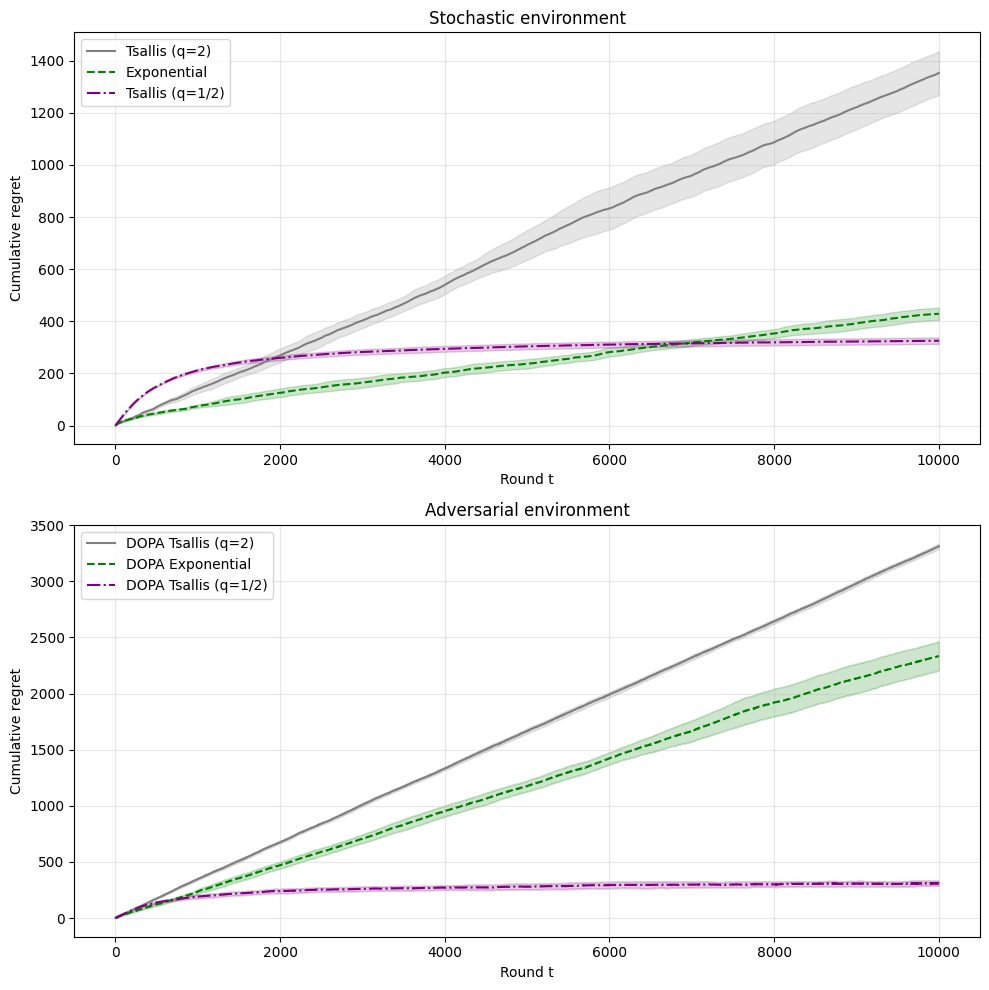

In [2]:
import matplotlib.pyplot as plt

t = np.arange(1, T + 1)
z = 1.96  # std is chosen like that for 95% confidence interval

plt.figure(figsize=(10, 10))

# =======================
# Stochastic
# =======================
plt.subplot(2, 1, 1)

se_uni = sto_uni_std / np.sqrt(n_runs)
plt.plot(t, sto_uni_mean, label="Tsallis (q=2)", color="gray")
plt.fill_between(
    t,
    sto_uni_mean - z * se_uni,
    sto_uni_mean + z * se_uni,
    alpha=0.2,
    color="gray",
)

se_exp = sto_exp_std / np.sqrt(n_runs)
plt.plot(t, sto_exp_mean, label="Exponential",
            linestyle="--", color="green")
plt.fill_between(
    t,
    sto_exp_mean - z * se_exp,
    sto_exp_mean + z * se_exp,
    alpha=0.2,
    color="green",
)

se_ts = sto_tsallis_std / np.sqrt(n_runs)
plt.plot(t, sto_tsallis_mean, label="Tsallis (q=1/2)",
            linestyle="-.", color="purple")
plt.fill_between(
    t,
    sto_tsallis_mean - z * se_ts,
    sto_tsallis_mean + z * se_ts,
    alpha=0.2,
    color="purple",
)

plt.title("Stochastic environment")
plt.xlabel("Round t")
plt.ylabel("Cumulative regret")
plt.legend()
plt.grid(True, alpha=0.3)

# =======================
# Adversarial
# =======================
plt.subplot(2, 1, 2)

se_uni = adv_uni_std / np.sqrt(n_runs)
plt.plot(t, adv_uni_mean, label="DOPA Tsallis (q=2)", color="gray")
plt.fill_between(
    t,
    adv_uni_mean - z * se_uni,
    adv_uni_mean + z * se_uni,
    alpha=0.2,
    color="gray",
)

se_exp = adv_exp_std / np.sqrt(n_runs)
plt.plot(t, adv_exp_mean, label="DOPA Exponential",
            linestyle="--", color="green")
plt.fill_between(
    t,
    adv_exp_mean - z * se_exp,
    adv_exp_mean + z * se_exp,
    alpha=0.2,
    color="green",
)

se_ts = adv_tsallis_std / np.sqrt(n_runs)
plt.plot(t, adv_tsallis_mean, label="DOPA Tsallis (q=1/2)",
            linestyle="-.", color="purple")
plt.fill_between(
    t,
    adv_tsallis_mean - z * se_ts,
    adv_tsallis_mean + z * se_ts,
    alpha=0.2,
    color="purple",
)

plt.title("Adversarial environment")
plt.xlabel("Round t")
plt.ylabel("Cumulative regret")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("regret_plot.pdf", bbox_inches="tight")
plt.show()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from utils.utils import run_stochastic, run_adversarial

def single_experiment(T, K, gap, n_runs, eta_exp, eta_uni, seed, tag):
    (
        sto_tsallis_mean,
        sto_tsallis_std,
        sto_exp_mean,
        sto_exp_std,
        sto_uni_mean,
        sto_uni_std,
    ) = run_stochastic(
        T=T,
        K=K,
        n_runs=n_runs,
        gap=gap,
        eta_exp=eta_exp,
        eta_uni=eta_uni,
        seed=seed,
    )

    (
        adv_tsallis_mean,
        adv_tsallis_std,
        adv_exp_mean,
        adv_exp_std,
        adv_uni_mean,
        adv_uni_std,
    ) = run_adversarial(
        T=T,
        K=K,
        n_runs=n_runs,
        eta_exp=eta_exp,
        eta_uni=eta_uni,
        seed=seed,
    )

    t = np.arange(1, T + 1)
    z = 1.96

    plt.figure(figsize=(10, 10))

    # Stochastic
    plt.subplot(2, 1, 1)
    n_runs_float = float(n_runs)

    se_uni = sto_uni_std / np.sqrt(n_runs_float)
    plt.plot(t, sto_uni_mean, label="Tsallis (q=2)", color="gray")
    plt.fill_between(t, sto_uni_mean - z * se_uni,
                        sto_uni_mean + z * se_uni,
                        alpha=0.2, color="gray")

    se_exp = sto_exp_std / np.sqrt(n_runs_float)
    plt.plot(t, sto_exp_mean, label="Exponential",
                linestyle="--", color="green")
    plt.fill_between(t, sto_exp_mean - z * se_exp,
                        sto_exp_mean + z * se_exp,
                        alpha=0.2, color="green")

    se_ts = sto_tsallis_std / np.sqrt(n_runs_float)
    plt.plot(t, sto_tsallis_mean, label="Tsallis (q=1/2)",
                linestyle="-.", color="purple")
    plt.fill_between(t, sto_tsallis_mean - z * se_ts,
                        sto_tsallis_mean + z * se_ts,
                        alpha=0.2, color="purple")

    plt.title(f"Stochastic, K={K}, gap={gap}, T={T}")
    plt.xlabel("Round t")
    plt.ylabel("Cumulative regret")
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Adversarial
    plt.subplot(2, 1, 2)

    se_uni = adv_uni_std / np.sqrt(n_runs_float)
    plt.plot(t, adv_uni_mean, label="Tsallis (q=2)", color="gray")
    plt.fill_between(t, adv_uni_mean - z * se_uni,
                        adv_uni_mean + z * se_uni,
                        alpha=0.2, color="gray")

    se_exp = adv_exp_std / np.sqrt(n_runs_float)
    plt.plot(t, adv_exp_mean, label="Exponential",
                linestyle="--", color="green")
    plt.fill_between(t, adv_exp_mean - z * se_exp,
                        adv_exp_mean + z * se_exp,
                        alpha=0.2, color="green")

    se_ts = adv_tsallis_std / np.sqrt(n_runs_float)
    plt.plot(t, adv_tsallis_mean, label="Tsallis (q=1/2)",
                linestyle="-.", color="purple")
    plt.fill_between(t, adv_tsallis_mean - z * se_ts,
                        adv_tsallis_mean + z * se_ts,
                        alpha=0.2, color="purple")

    plt.title(f"Adversarial, K={K}, T={T}")
    plt.xlabel("Round t")
    plt.ylabel("Cumulative regret")
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f"regret_plot_{tag}.pdf", bbox_inches="tight")
    plt.close()

if __name__ == "__main__":
    n_runs = 10
    eta_exp = 1.0
    eta_uni = 1.0
    seed = 1234

    # Example grid: K in {5,10,20}, one gap and two T values
    for K in [5, 10, 20]:
        for T in [2000, 10000]:
            gap = 0.1
            tag = f"K{K}_T{T}"
            single_experiment(T, K, gap, n_runs, eta_exp, eta_uni, seed, tag)
